<a href="https://colab.research.google.com/github/HARSHIT097/Learnings/blob/main/k_means_hierrical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [5]:
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [4]:
data = pd.read_csv("/content/Country-data.csv")
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Data Cleaning

In [7]:
#missing values
round(100*(data.isnull().sum())/len(data), 2)


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

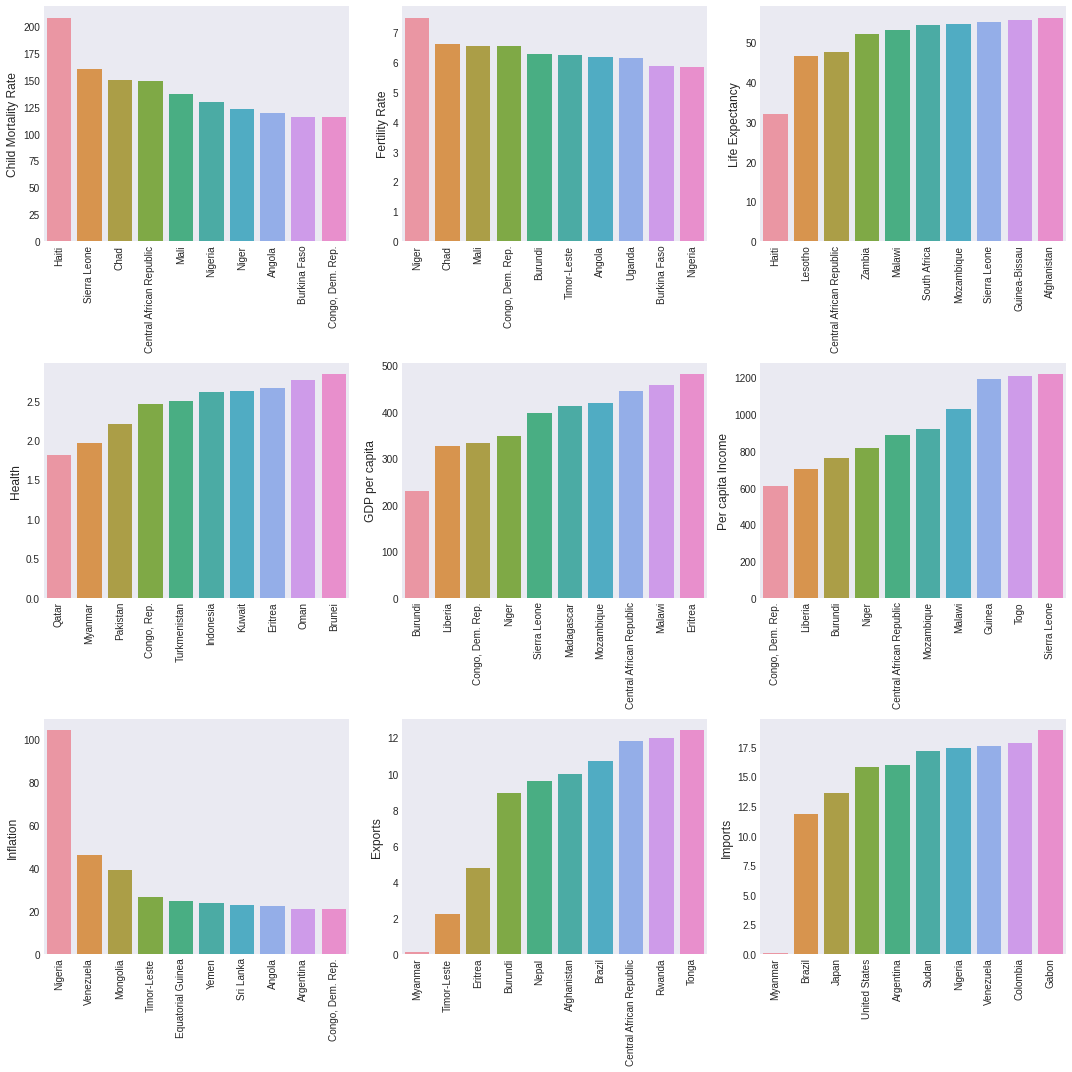

In [59]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

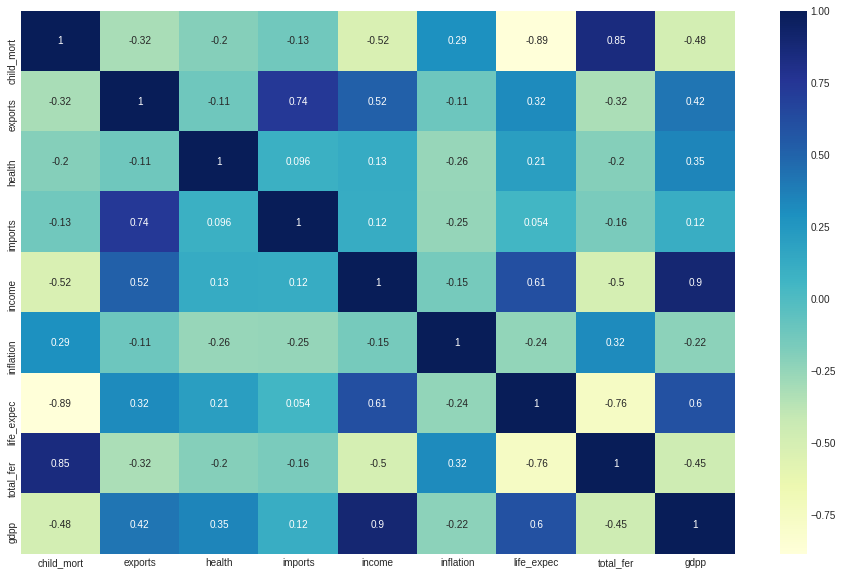

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

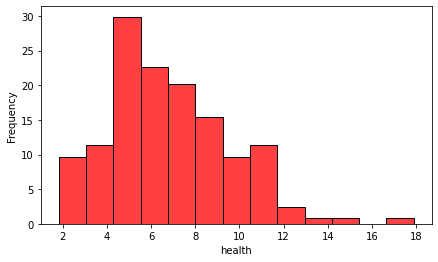

In [8]:
## Health Analysis per Country
plt.figure(figsize= [7,4])
sns.histplot(data.health, stat="frequency",color="red")
plt.show()

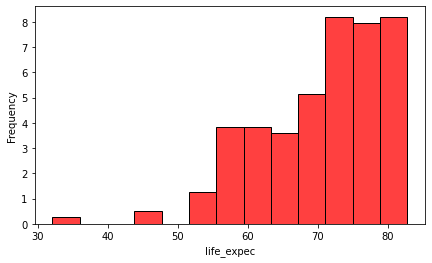

In [10]:
## life_expec Analysis per Country
plt.figure(figsize= [7,4])
sns.histplot(data.life_expec, stat="frequency",color="red")
plt.show()

In [11]:
data.child_mort.describe()


count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

The interQuartile Range : 112.54


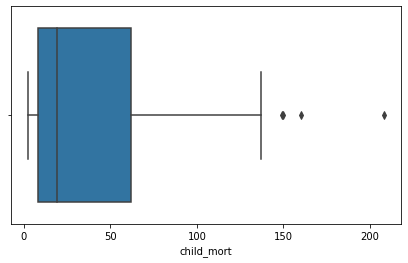

In [15]:
# Inter Quartile Range
Q1 = data.child_mort.quantile(0.05)
Q3 = data.child_mort.quantile(0.95)
IQR = Q3 - Q1
print("The interQuartile Range :",IQR)

# child mortality
plt.figure(figsize= [7,4])
sns.boxplot(data.child_mort)
plt.show()


The interQuartile Range : 48144.1


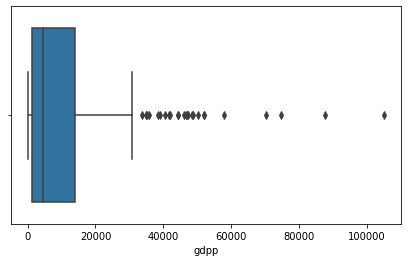

In [16]:
# Inter Quartile Range
Q1 = data.gdpp.quantile(0.05)
Q3 = data.gdpp.quantile(0.95)
IQR = Q3 - Q1
print("The interQuartile Range :",IQR)

plt.figure(figsize= [7,4])
sns.boxplot(data.gdpp)
plt.show()



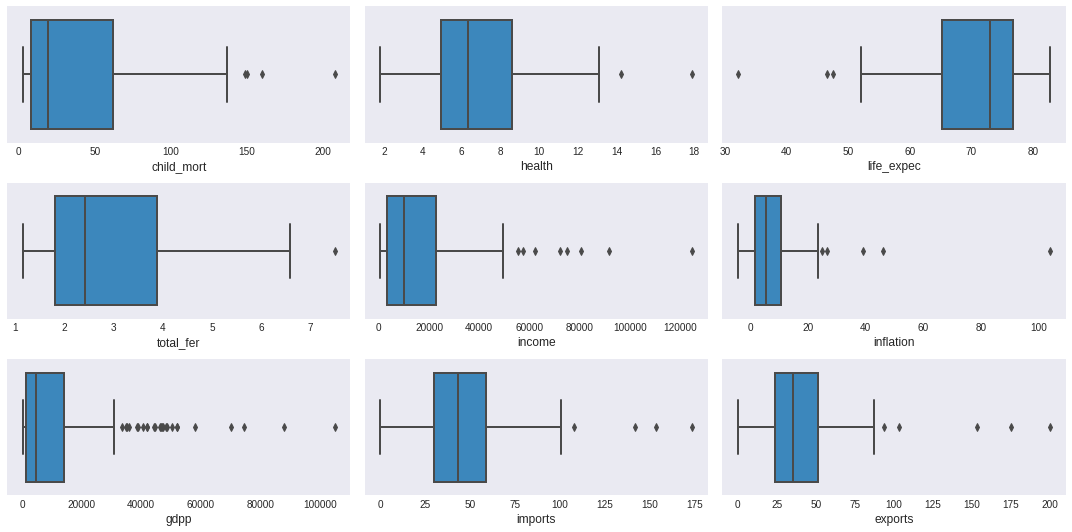

In [61]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])


plt.tight_layout()

Bivariate Analysis

# New Section

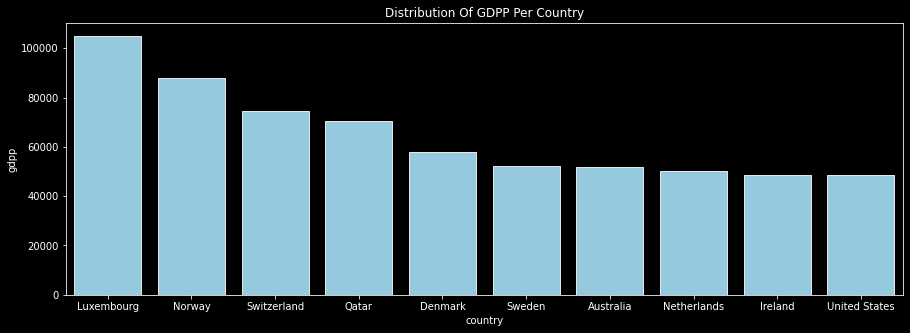

In [18]:
top1 = data.groupby(by="country").max()
top1 = top1.sort_values(by = "gdpp",ascending = False)
top2 = top1.head(10)
top2 = top2.reset_index()
#top2.head()

plt.style.use("dark_background")
plt.figure(figsize = [15,5])
sns.barplot(top2.country,top2.gdpp, color = "skyblue", errcolor=".9", edgecolor=".9")
plt.title("Distribution Of GDPP Per Country", fontsize = 12, fontweight = 8, verticalalignment = 'baseline')
plt.show()

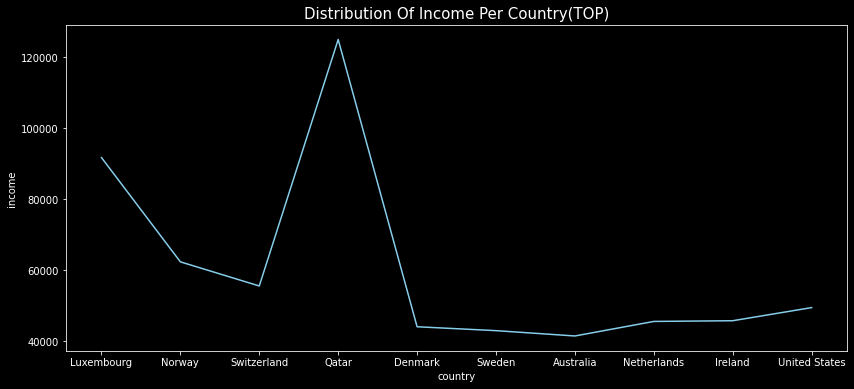

In [19]:
plt.figure(figsize = [14,6])
sns.lineplot(top2.country,top2.income, color = "skyblue")
plt.title("Distribution Of Income Per Country(TOP)", fontsize = 15, fontweight = 8, verticalalignment = 'baseline')
plt.show()

In [20]:
data1 = data.groupby(by="country").max()
low1 = data1.sort_values(by = "gdpp",ascending = True)
low2 = low1.head(10)
low2 = low2.reset_index()
low2.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
2,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
4,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


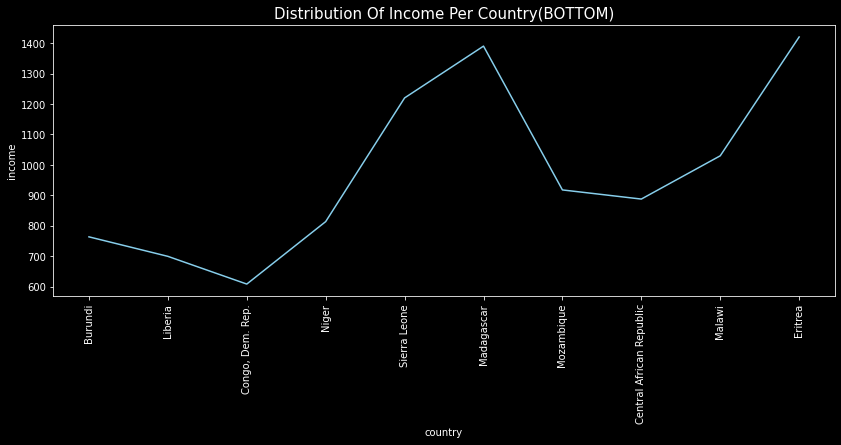

In [21]:
plt.figure(figsize = [14,5])
sns.lineplot(low2.country,low2.income, color = "skyblue")
plt.xticks(rotation=90)
plt.title("Distribution Of Income Per Country(BOTTOM)", fontsize = 15, fontweight = 8, verticalalignment = 'baseline')
plt.show()

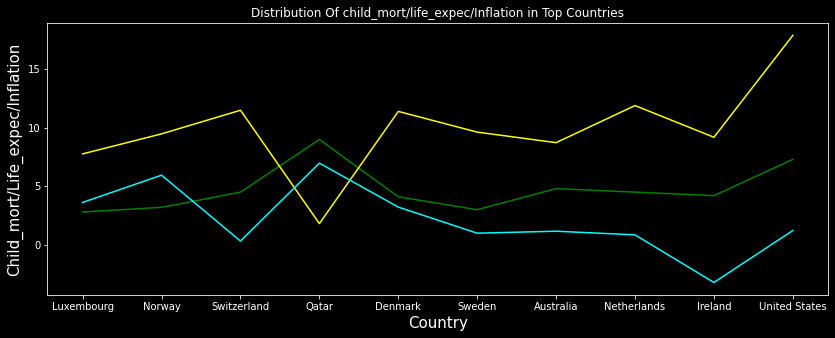

In [22]:
plt.figure(figsize= [14,5])
df_country = np.array(top2.country)
df_child_mort = np.array(top2.child_mort)
df_health = np.array(top2.health)
df_life_expec = np.array(top2.life_expec)
df_inflation = np.array(top2.inflation)
plt.plot(df_country,df_child_mort, color = "green", label = "countryvschild_mort")
plt.plot(df_country,df_health, color = "yellow", label = "countryvshealth")

#plt.plot(df_country,df_life_expec, color = "red", label = "countryvslife_expec")
plt.plot(df_country,df_inflation, color = "cyan", label = "countryvsinflation")
plt.xlabel("Country",fontdict = {'fontsize': 15, 'fontweight':5, 'color': 'white'})
plt.ylabel("Child_mort/Life_expec/Inflation",fontdict = {'fontsize': 15, 'fontweight':5, 'color': 'white'})
plt.title("Distribution Of child_mort/life_expec/Inflation in Top Countries")
plt.show()


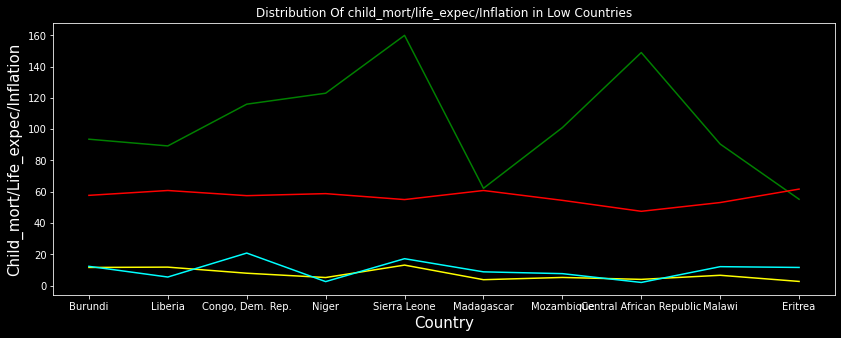

In [23]:
plt.figure(figsize= [14,5])
df_country = np.array(low2.country)
df_child_mort = np.array(low2.child_mort)
df_health = np.array(low2.health)
df_life_expec = np.array(low2.life_expec)
df_inflation = np.array(low2.inflation)
plt.plot(df_country,df_child_mort, color = "green", label = "countryvschild_mort")
plt.plot(df_country,df_health, color = "yellow", label = "countryvshealth")
plt.plot(df_country,df_life_expec, color = "red", label = "countryvslife_expec")
plt.plot(df_country,df_inflation, color = "cyan", label = "countryvsinflation")
plt.xlabel("Country",fontdict = {'fontsize': 15, 'fontweight':5, 'color': 'white'})
plt.ylabel("Child_mort/Life_expec/Inflation",fontdict = {'fontsize': 15, 'fontweight':5, 'color': 'white'})
plt.title("Distribution Of child_mort/life_expec/Inflation in Low Countries")
plt.show()


In [24]:
low2.corr()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,0.102407,0.367822,-0.110795,-0.359275,0.013934,-0.672694,0.368079,-0.101124
exports,0.102407,1.000000,-0.020508,0.332442,-0.390909,0.308743,-0.008254,0.342563,-0.092988
health,0.367822,-0.020508,1.000000,0.451551,-0.392286,0.395365,0.060951,0.132574,-0.650237
imports,-0.110795,0.332442,0.451551,1.000000,-0.533101,-0.184493,0.406689,0.113913,-0.484572
income,-0.359275,-0.390909,-0.392286,-0.533101,1.000000,0.060117,0.204447,-0.665469,0.661529
inflation,0.013934,0.308743,0.395365,-0.184493,0.060117,1.000000,0.163749,-0.008544,-0.135250
life_expec,-0.672694,-0.008254,0.060951,0.406689,0.204447,0.163749,1.000000,-0.017776,-0.282116
total_fer,0.368079,0.342563,0.132574,0.113913,-0.665469,-0.008544,-0.017776,1.000000,-0.576888
gdpp,-0.101124,-0.092988,-0.650237,-0.484572,0.661529,-0.135250,-0.282116,-0.576888,1.000000


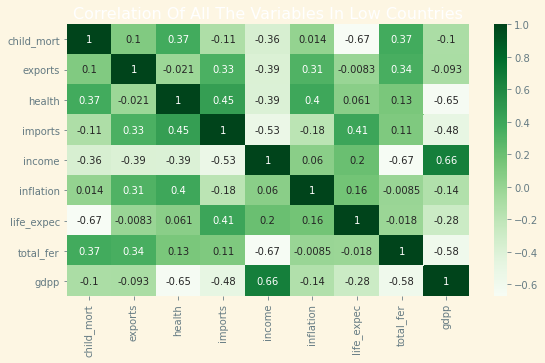

In [25]:
plt.style.use("Solarize_Light2")
plt.figure(figsize = [9,5])
plt.title("Correlation Of All The Variables In Low Countries")
sns.heatmap(low2.corr(),annot=True,cmap="Greens")


Prepare the data for modelling

R (gdpp): gdpp

F (child_mort): child_mort

M (income): income

You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [27]:
# M (income): income
grouped_df1 = data.groupby('country')['income'].sum()
grouped_df1 = grouped_df1.reset_index()
grouped_df1.head()


,country,income
0,Afghanistan,1610
1,Albania,9930
2,Algeria,12900
3,Angola,5900
4,Antigua and Barbuda,19100


In [28]:
# F (child_mort): child_mort
frequency = data[['country','child_mort']]
frequency.head()


,country,child_mort
0,Afghanistan,90.2
1,Albania,16.6
2,Algeria,27.3
3,Angola,119.0
4,Antigua and Barbuda,10.3


In [29]:
# R (gdpp): gdpp
recency = data[['country','gdpp']]
recency.head()

,country,gdpp
0,Afghanistan,553
1,Albania,4090
2,Algeria,4460
3,Angola,3530
4,Antigua and Barbuda,12200


In [30]:
# merge the two dfs
grouped_df = pd.merge(grouped_df1, frequency, on='country', how='inner')
grouped_df.head()

,country,income,child_mort
0,Afghanistan,1610,90.2
1,Albania,9930,16.6
2,Algeria,12900,27.3
3,Angola,5900,119.0
4,Antigua and Barbuda,19100,10.3


In [31]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, recency, on='country', how='inner')
grouped_df.head()

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
1,Albania,9930,16.6,4090
2,Algeria,12900,27.3,4460
3,Angola,5900,119.0,3530
4,Antigua and Barbuda,19100,10.3,12200


Outliers

In [32]:
# Checking for outliers in the continuous variables
num_grouped_df = grouped_df.groupby(by = "country").sum()

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_grouped_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,income,child_mort,gdpp
count,167.000000,167.000000,167.000000
mean,17144.688623,38.270060,12964.155689
std,19278.067698,40.328931,18328.704809
min,609.000000,2.600000,231.000000
25%,3355.000000,8.250000,1330.000000
50%,9960.000000,19.300000,4660.000000
75%,22800.000000,62.100000,14050.000000
90%,41220.000000,100.220000,41840.000000
95%,48290.000000,116.000000,48610.000000
99%,84374.000000,153.400000,79088.000000


In [33]:
# removing (statistical) outliers
Q1 = grouped_df.income.quantile(0.05)
Q3 = grouped_df.income.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.income >= Q1 - 1.5*IQR) & (grouped_df.income <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.child_mort.quantile(0.05)
Q3 = grouped_df.child_mort.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.child_mort >= Q1 - 1.5*IQR) & (grouped_df.child_mort <= Q3 + 1.5*IQR)]
# outlier treatment for frequency
Q1 = grouped_df.gdpp.quantile(0.05)
Q3 = grouped_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.gdpp >= Q1 - 1.5*IQR) & (grouped_df.gdpp <= Q3 + 1.5*IQR)]

# 2. rescaling
rfm_df = grouped_df[['income', 'child_mort', 'gdpp']]
# instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(166, 3)

In [34]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['income', 'child_mort', 'gdpp']
rfm_df_scaled.head()

,income,child_mort,gdpp
0,-0.857748,1.285341,-0.678732
1,-0.378307,-0.542572,-0.479766
2,-0.207160,-0.276829,-0.458953
3,-0.610536,2.000611,-0.511268
4,0.150116,-0.699037,-0.023556


Modelling

In [35]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.labels_


array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 3, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       3, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

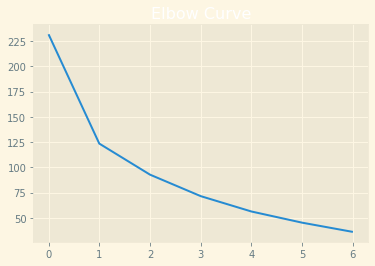

In [37]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
 kmeans.fit(rfm_df_scaled)

 ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.title("Elbow Curve")
plt.plot(ssd)


Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [38]:
# silhouette analysis
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

 # intialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
 kmeans.fit(rfm_df_scaled)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
 print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5655742072957856
For n_clusters=3, the silhouette score is 0.5311874946349608
For n_clusters=4, the silhouette score is 0.531699886308155
For n_clusters=5, the silhouette score is 0.4441414271536096
For n_clusters=6, the silhouette score is 0.4627805219091555
For n_clusters=7, the silhouette score is 0.454061466941679
For n_clusters=8, the silhouette score is 0.45780876548383054


In [39]:
# final model with k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()


,country,income,child_mort,gdpp,cluster_id
0,Afghanistan,1610,90.2,553,1
1,Albania,9930,16.6,4090,1
2,Algeria,12900,27.3,4460,1
3,Angola,5900,119.0,3530,1
4,Antigua and Barbuda,19100,10.3,12200,1


Change in income after clustering

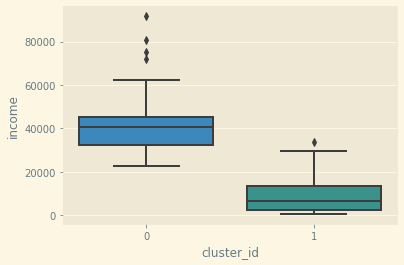

In [42]:
plt.style.use("Solarize_Light2")
sns.boxplot(x='cluster_id', y='income', data=grouped_df)


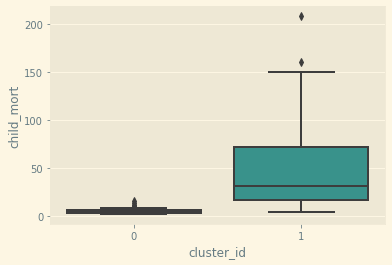

In [43]:
#change in child mortality
sns.boxplot(x='cluster_id', y='child_mort', data=grouped_df)

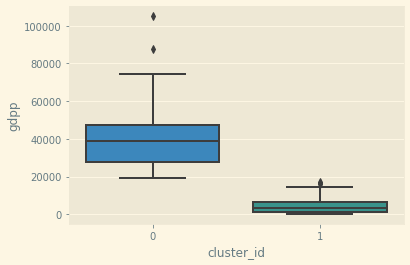

In [44]:
# gdpp
sns.boxplot(x='cluster_id', y='gdpp', data=grouped_df)


In [45]:
cluster_1 = grouped_df.where(grouped_df.cluster_id == 1)
cluster_1 = cluster_1.dropna()
cluster_1 = cluster_1.sort_values(by = ['income','child_mort','gdpp'], ascending= False)
cluster_1.head()


,country,income,child_mort,gdpp,cluster_id
49,Equatorial Guinea,33700.0,111.0,17100.0,1.0
89,Libya,29600.0,16.6,12100.0,1.0
134,Slovak Republic,25200.0,7.0,16600.0,1.0
125,Russia,23100.0,10.0,10700.0,1.0
51,Estonia,22700.0,4.5,14600.0,1.0


In [46]:
cluster_0 = grouped_df.where(grouped_df.cluster_id == 0)
cluster_0 = cluster_0.dropna()
cluster_0 = cluster_0.sort_values(by = ['income','child_mort','gdpp'], ascending= False)
cluster_0.head()


,country,income,child_mort,gdpp,cluster_id
91,Luxembourg,91700.0,2.8,105000.0,0.0
23,Brunei,80600.0,10.5,35300.0,0.0
82,Kuwait,75200.0,10.8,38500.0,0.0
133,Singapore,72100.0,2.8,46600.0,0.0
114,Norway,62300.0,3.2,87800.0,0.0


In [47]:
cluster_01 = grouped_df.drop(columns="country")
labels_scale = kmeans.labels_


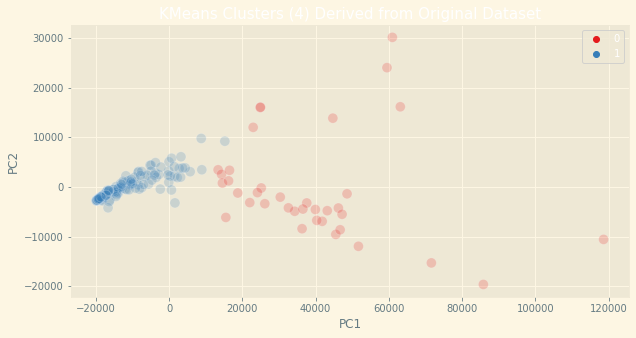

In [48]:
from sklearn import svm
import numpy as np
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA
plt.style.use("Solarize_Light2")
plt.figure(figsize = [10,5])
pca2 = PCA(n_components=3).fit(cluster_01)
pca2d = pca2.transform(cluster_01)
sns.scatterplot(pca2d[:,0], pca2d[:,1],
 hue=labels_scale,
 palette='Set1',
 s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

By Hierarchial Clustering

In [49]:
rfm_df_scaled.head()


,income,child_mort,gdpp
0,-0.857748,1.285341,-0.678732
1,-0.378307,-0.542572,-0.479766
2,-0.207160,-0.276829,-0.458953
3,-0.610536,2.000611,-0.511268
4,0.150116,-0.699037,-0.023556


In [50]:
grouped_df.head()

,country,income,child_mort,gdpp,cluster_id
0,Afghanistan,1610,90.2,553,1
1,Albania,9930,16.6,4090,1
2,Algeria,12900,27.3,4460,1
3,Angola,5900,119.0,3530,1
4,Antigua and Barbuda,19100,10.3,12200,1


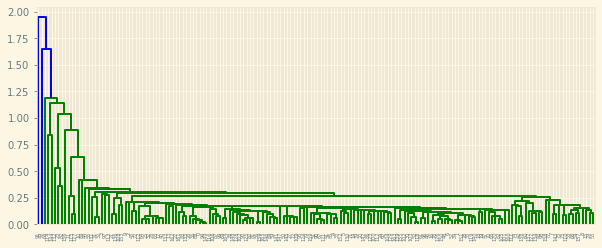

In [51]:
# single linkage
plt.figure(figsize = [10,4])
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

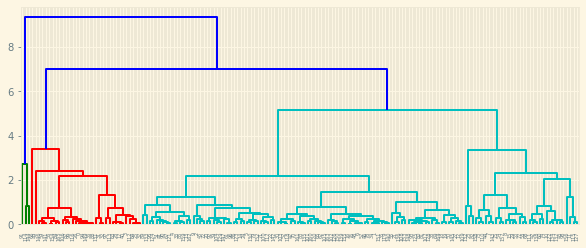

In [52]:
# complete linkage -- complete linkage give us the better flow of chart
plt.figure(figsize = [10,4])
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters.

[Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

</b>
4 clusters - Here we consider the Optimum Value for K == 4 as the range lies between 0 and 8

Cut Tree - Optimum Value = 4

In [53]:
# 4 clusters - Here we consider the Optimum Value for K == 4
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels


array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [54]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,country,income,child_mort,gdpp,cluster_id,cluster_labels
0,Afghanistan,1610,90.2,553,1,0
1,Albania,9930,16.6,4090,1,1
2,Algeria,12900,27.3,4460,1,1
3,Angola,5900,119.0,3530,1,0
4,Antigua and Barbuda,19100,10.3,12200,1,1


In [55]:
grouped_df.cluster_labels.value_counts()

1    96
2    34
0    33
3     3
Name: cluster_labels, dtype: int64

In [56]:
cluster_01 = grouped_df.drop(columns="country")
labels_scale = cluster_labels


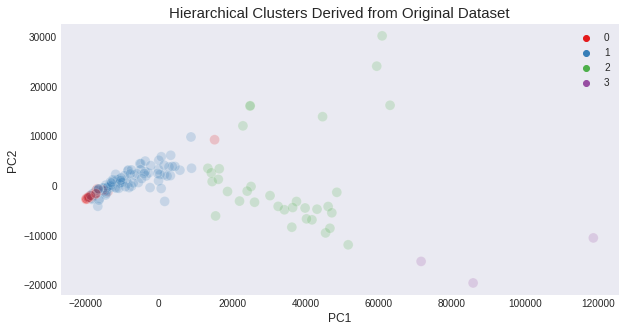

In [57]:
from sklearn import svm
import numpy as np
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA
plt.style.use("seaborn-dark")
plt.figure(figsize = [10,5])
pca2 = PCA(n_components=3).fit(cluster_01)
pca2d = pca2.transform(cluster_01)
sns.scatterplot(pca2d[:,0], pca2d[:,1],
 hue=labels_scale,
 palette='Set1',
 s=100, alpha=0.2).set_title('Hierarchical Clusters Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()


In [58]:
#lets do it with highest cluster labels
cluster03 = grouped_df.where(grouped_df.cluster_labels == 2)
cluster03 = cluster03.dropna()
cluster03.head()


,country,income,child_mort,gdpp,cluster_id,cluster_labels
7,Australia,41400.0,4.8,51900.0,0.0,2.0
8,Austria,43200.0,4.3,46900.0,0.0,2.0
10,Bahamas,22900.0,13.8,28000.0,0.0,2.0
11,Bahrain,41100.0,8.6,20700.0,0.0,2.0
15,Belgium,41100.0,4.5,44400.0,0.0,2.0


# Pca And Hopkins statistics

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [62]:
# Before manipulating data, we will save one copy of orignal data.
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [63]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]

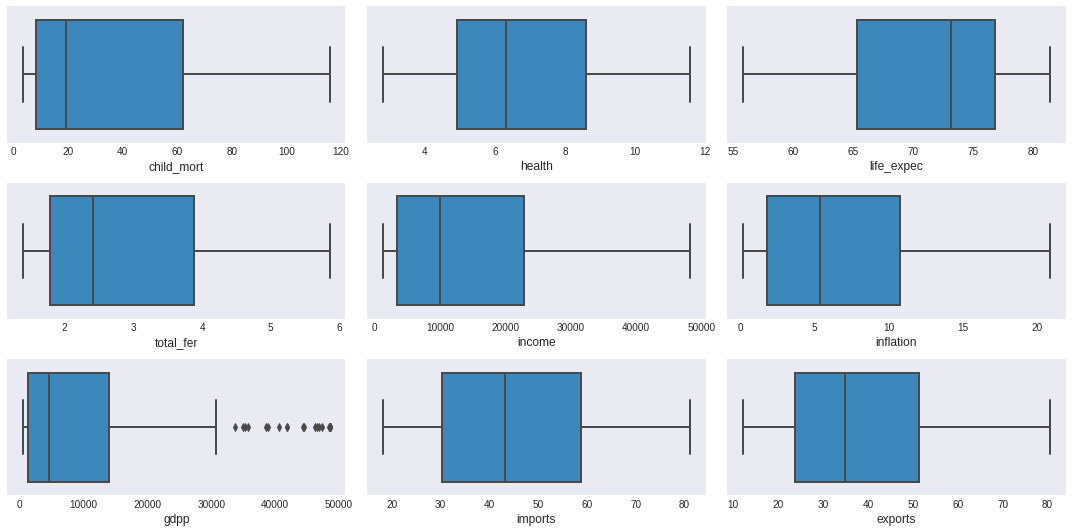

In [64]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

In [65]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [66]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

# Putting feature variable to X
X = data_help.drop(['country'],axis=1)

# Putting response variable to y
y = data_help['country']

#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [67]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [68]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income


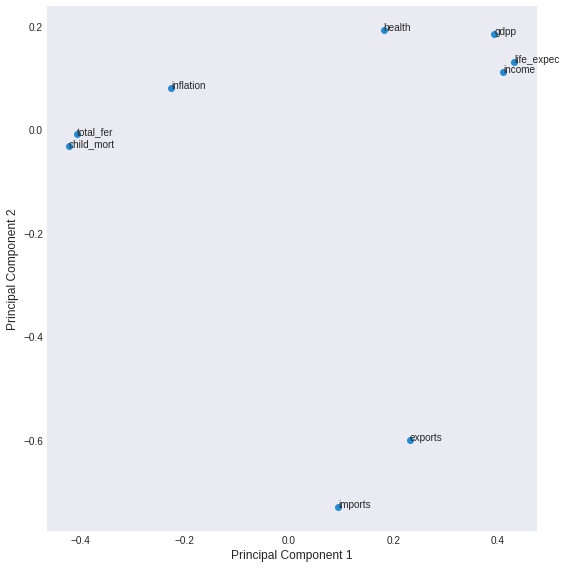

In [69]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [70]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

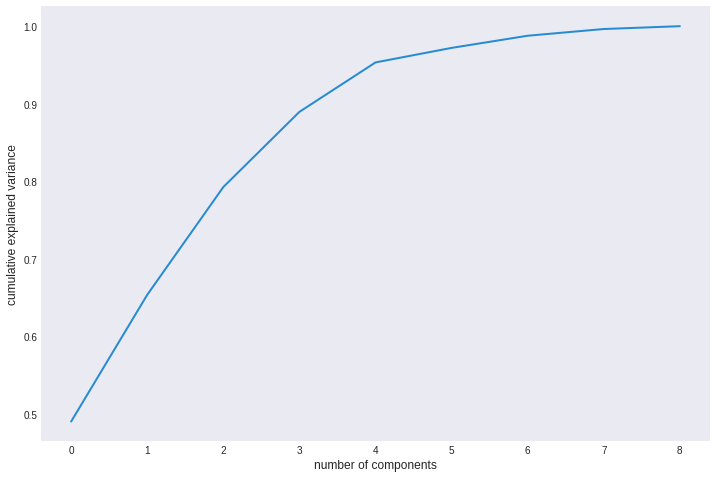

In [71]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [72]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

In [73]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


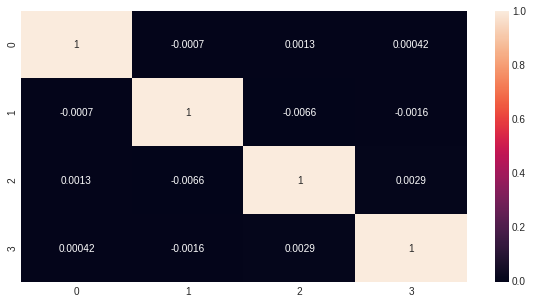

In [75]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [76]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [77]:
hopkins(df_pca)

0.7601485685617217

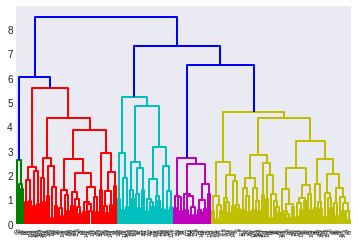

In [78]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [79]:
# Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [81]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


In [82]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [84]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,89.095652,25.519783,6.843261,43.310870,3139.413043,10.894239,59.323913,4.897609,1536.304348
1,1,22.604286,35.562700,6.167857,43.363799,10973.571429,7.732657,72.742857,2.268000,5903.057143
2,2,97.825000,70.975000,3.550000,54.425000,12027.500000,21.725000,62.400000,5.325000,6142.500000
3,3,4.268421,32.705263,10.448421,31.663158,38857.894737,1.625158,80.905263,1.812105,43505.263158
4,4,8.500000,82.021429,6.391429,70.842857,41578.214286,4.977393,77.682143,1.876071,29641.428571


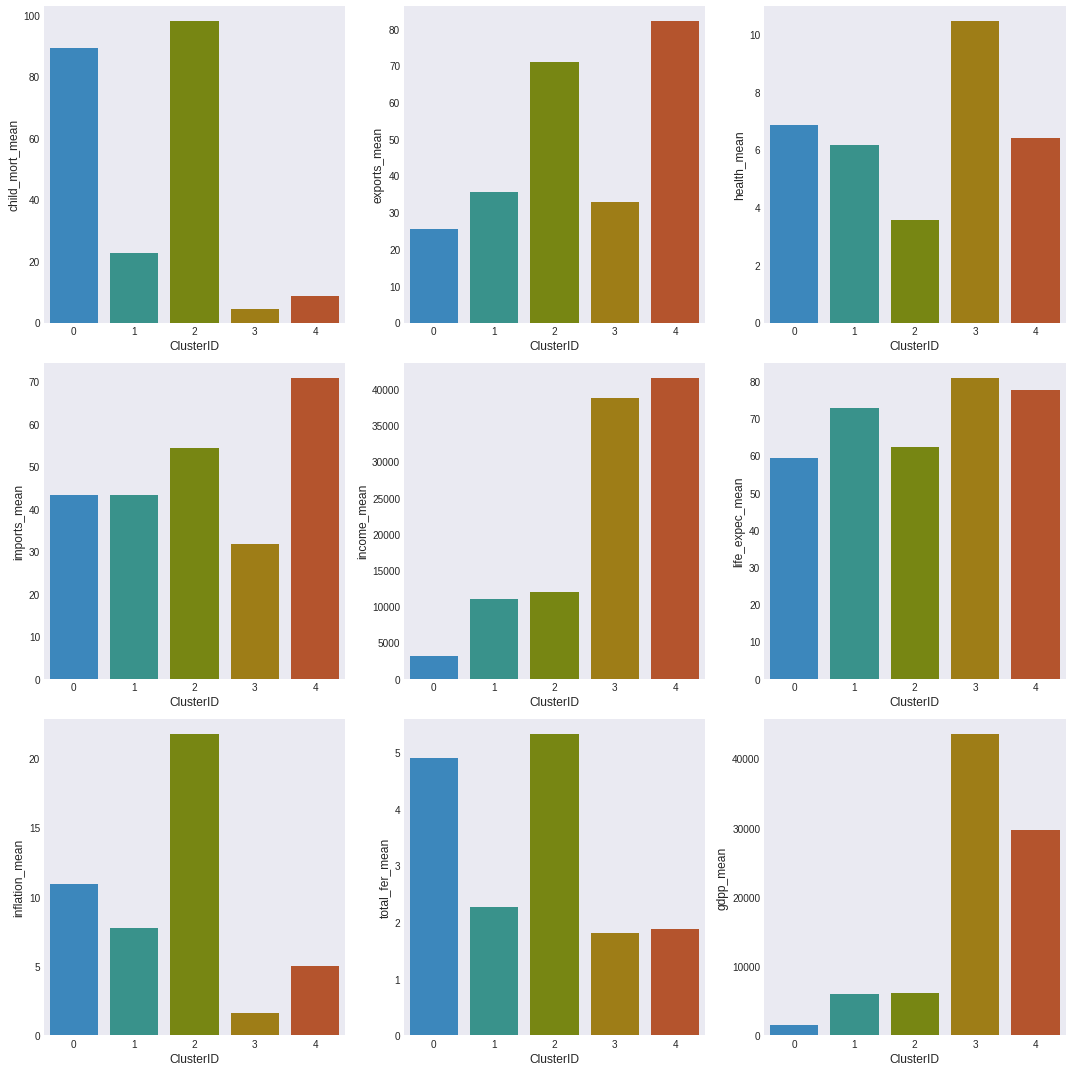

In [85]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [90]:

print("Recommendations \n Cluster with ClusterID as 0, is the cluster of most backward country.\nCountries on which we require to focus more are")
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

Recommendations 
 Cluster with ClusterID as 0, is the cluster of most backward country.
Countries on which we require to focus more are


array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)